In [1]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D , Flatten ,Dense, Dropout , BatchNormalization
from PIL import Image 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#  One Hot Encoding the Target Classes

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - normal

OneHotEncoder()

# Creating 3 Important Lists --
1.data list for storing image data in numpy array form 

2.paths list for storing paths for all images 

3.result list for storing one hot encoded form of target class whether normal or tumor

In [3]:
#This cell updates result list for images with tumor
data = []
paths = []
result = []

for r,d,f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
     for file in f:
            if '.jpg' in file:
                paths.append(os.path.join(r, file))
                
for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
    

In [4]:
#This cell updates result list for images without tumor
paths = []
for r,d,f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
            
    for path in paths:
        img = Image.open(path)
        img = img.resize((128,128))
        img = np.array(img)
        if(img.shape == (128,128,3)):
            data.append(np.array(img))
            result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

#  Splitting the data into Training and Testing

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size =0.2, shuffle = True, random_state = 0)

# Model Building 
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epoches required to train deep networks.

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2), input_shape=(128,128,3), padding = 'same'))
model.add(Conv2D(32, kernel_size=(2,2), activation ='relu', padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu', padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())


2022-11-24 09:03:30.438842: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        1

In [9]:
y_train.shape

(111, 2)

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1, validation_data = (x_test, y_test))


Epoch 1/30


2022-11-24 09:03:30.890386: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3/3 [==============================] - 4s 926ms/step - loss: 27.2609 - val_loss: 57.0165
Epoch 2/30
3/3 [==============================] - 2s 780ms/step - loss: 10.6657 - val_loss: 20.1919
Epoch 3/30
3/3 [==============================] - 2s 795ms/step - loss: 4.8809 - val_loss: 17.8709
Epoch 4/30
3/3 [==============================] - 2s 809ms/step - loss: 4.2419 - val_loss: 23.1895
Epoch 5/30
3/3 [==============================] - 2s 806ms/step - loss: 1.9974 - val_loss: 7.8813
Epoch 6/30
3/3 [==============================] - 2s 815ms/step - loss: 0.8075 - val_loss: 7.3535
Epoch 7/30
3/3 [==============================] - 2s 788ms/step - loss: 0.4904 - val_loss: 5.7655
Epoch 8/30
3/3 [==============================] - 2s 787ms/step - loss: 0.5310 - val_loss: 5.6071
Epoch 9/30
3/3 [==============================] - 2s 788ms/step - loss: 0.1615 - val_loss: 5.8416
Epoch 10/30
3/3 [==============================] - 2s 780ms/step - loss: 0.1376 - val_loss: 7.2366
Epoch 11/30
3/3 [=======

# Plotting Losses

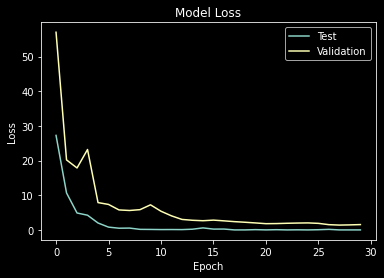

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc ='upper right')
plt.show()

# Just Checking the Model 

In [12]:
def names(number):

    if number==0:
        return 'A Tumor'
    else:
        return 'Not A Tumor'

100.0% Confidence This Is Not A Tumor


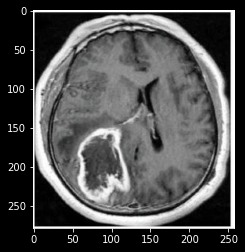

In [13]:
from matplotlib.pyplot import imshow
img = Image.open(r"/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y109.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))